In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [112]:
env_name = 'Acrobot-v1'
#env_name = 'MountainCar-v0'
#env_name = 'LunarLander-v2'

training_methods = ['_epsilon_greedy', '_GBRS',
                    '_greedy', '_MixIn', '_PBRS', '_DPBRS']
data_to_plot = []

fig_width = 8
fig_height = 4

window_len_smooth = 20
min_window_len_smooth = 1
linewidth_smooth = 1.5
alpha_smooth = 1

window_len_var = 8
min_window_len_var = 1
linewidth_var = 2
alpha_var = 0.2

fig_num = 0
data_to_plot = []


In [113]:
def load_data(training_method):

    log_dir = "../scripts/storage/DQN_episode_intrinsic_rewards" + '/' + env_name + \
        '/' + env_name + training_method + '/'
    path = Path(log_dir)
    if path.exists():
        current_num_files = next(os.walk(log_dir))[2]

        num_runs = len(current_num_files)
        print(num_runs)
        all_runs = []
        for run_num in range(num_runs):
            log_f_name = log_dir + '/DQN_' + env_name + \
                "_inrinsic_log_" + str(run_num) + ".csv"
            #print("loading data from : " + log_f_name)
            data = pd.read_csv(log_f_name)
            data = pd.DataFrame(data)
            #print("data shape : ", data.shape)
            all_runs.append(data)

        df_concat = pd.concat(all_runs)
        df_concat_groupby = df_concat.groupby(df_concat.index)
        data_avg = df_concat_groupby.mean()

        data_to_plot.append(data_avg)
    else:
        print(f"directory: {path} does not exist")


In [114]:
def plot(training_method):
     for i, avg in enumerate(data_to_plot):
           # smooth out rewards to get a smooth and a less smooth (var) plot lines
           if training_method == '_epsilon_greedy' or training_method == '_greedy':
                 fig, axs = plt.subplots(2, sharex=True)
                  fig.suptitle(f'Rewards in "{env_name}"{training_method}')
                  fig.tight_layout()
                  fig.set_size_inches(fig_width, fig_height)

                  avg['true_reward'] = avg['reward'].rolling(
                      window=window_len_smooth, win_type='triang', min_periods=min_window_len_smooth).mean()
                  avg['reward_var_' + str(i)] = avg['reward'].rolling(
                      window=window_len_var, win_type='triang', min_periods=min_window_len_var).mean()

                  avg['intrinsic_reward'] = avg['int_reward'].rolling(
                      window=window_len_smooth, win_type='triang', min_periods=min_window_len_smooth).mean()
                  avg['intrinsic_reward_var_' + str(i)] = avg['int_reward'].rolling(
                      window=window_len_var, win_type='triang', min_periods=min_window_len_var).mean()
                  # plot the line
                  avg.plot(kind='line', x='done_steps', y='true_reward',
                           ax=axs[0], color='red',  linewidth=linewidth_smooth, alpha=alpha_smooth)
                  avg.plot(kind='line', x='done_steps', y='reward_var_' + str(i),
                           ax=axs[0], color='red',  linewidth=linewidth_var, alpha=alpha_var)

                  avg.plot(kind='line', x='done_steps', y='intrinsic_reward',
                           ax=axs[1], color='blue',  linewidth=linewidth_smooth, alpha=alpha_smooth)
                  avg.plot(kind='line', x='done_steps', y='intrinsic_reward_var_' + str(i),
                           ax=axs[1], color='blue',  linewidth=linewidth_var, alpha=alpha_var)
                  axs[0].set_title("True Reward")
                  axs[1].set_title("Intrinsic Reward")
                  axs[0].grid(True)
                  axs[1].set(xlabel='Time steps')
                  axs[0].get_legend().remove()
                  axs[1].get_legend().remove()
                  axs[1].grid(True)

            else:
                 fig, axs = plt.subplots(3, sharex=True)
                  fig.suptitle(f'Rewards in "{env_name}"{training_method}')
                  fig.tight_layout()
                  fig.set_size_inches(fig_width, fig_height)

                  fig.set_size_inches(fig_width, fig_height)
                  avg['true_reward'] = avg['reward'].rolling(
                      window=window_len_smooth, win_type='triang', min_periods=min_window_len_smooth).mean()
                  avg['reward_var_' + str(i)] = avg['reward'].rolling(
                      window=window_len_var, win_type='triang', min_periods=min_window_len_var).mean()

                  avg['intrinsic_reward'] = avg['int_reward'].rolling(
                      window=window_len_smooth, win_type='triang', min_periods=min_window_len_smooth).mean()
                  avg['intrinsic_reward_var_' + str(i)] = avg['int_reward'].rolling(
                      window=window_len_var, win_type='triang', min_periods=min_window_len_var).mean()

                  avg['shaped_reward'] = avg['shaped_reward'].rolling(
                      window=window_len_smooth, win_type='triang', min_periods=min_window_len_smooth).mean()
                  avg['shaped_reward_var_' + str(i)] = avg['shaped_reward'].rolling(
                      window=window_len_var, win_type='triang', min_periods=min_window_len_var).mean()
                  # plot the line

                  avg.plot(kind='line', x='done_steps', y='true_reward',
                           ax=axs[0], color='red',  linewidth=linewidth_smooth, alpha=alpha_smooth)
                  avg.plot(kind='line', x='done_steps', y='reward_var_' + str(i),
                           ax=axs[0], color='red',  linewidth=linewidth_var, alpha=alpha_var)
                  axs[0].set_title("True Reward")
                  axs[0].get_legend().remove()
                  axs[0].grid(True)

                  avg.plot(kind='line', x='done_steps', y='shaped_reward',
                           ax=axs[1], color='green',  linewidth=linewidth_smooth, alpha=alpha_smooth)
                  avg.plot(kind='line', x='done_steps', y='shaped_reward_var_' + str(i),
                           ax=axs[1], color='green',  linewidth=linewidth_var, alpha=alpha_var)
                  axs[1].set_title("Shaped Reward")
                  axs[1].get_legend().remove()
                  axs[1].grid(True)

                  avg.plot(kind='line', x='done_steps', y='intrinsic_reward',
                           ax=axs[2], color='blue',  linewidth=linewidth_smooth, alpha=alpha_smooth)
                  avg.plot(kind='line', x='done_steps', y='intrinsic_reward_var_' + str(i),
                           ax=axs[2], color='blue',  linewidth=linewidth_var, alpha=alpha_var)
                  axs[2].set_title("Intrinsic Reward")
                  axs[2].grid(True)
                  axs[2].get_legend().remove()
                  axs[2].set(xlabel='Time steps')
      print("="*100)
      plt.show()


5
[        episode  timestep  done_steps  reward  int_reward
0           0.0       1.0         1.0    -1.0        0.00
1           0.0       2.0         2.0    -1.0        0.00
2           0.0       3.0         3.0    -1.0        0.00
3           0.0       4.0         4.0    -1.0        0.00
4           0.0       5.0         5.0    -1.0        0.00
...         ...       ...         ...     ...         ...
302560   1999.0     100.0    302561.0    -1.0        0.32
302561   1999.0     101.0    302562.0    -1.0        0.34
302562   1999.0     102.0    302563.0    -1.0        0.43
302563   1999.0     103.0    302564.0    -1.0        0.43
302564   1999.0     104.0    302565.0     0.0        0.39

[302565 rows x 5 columns]]


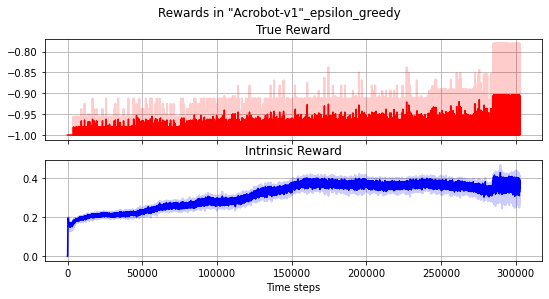

5
[        episode  timestep  done_steps  reward  int_reward  shaped_reward
0           0.0       1.0         1.0    -1.0        0.00          -1.00
1           0.0       2.0         2.0    -1.0        0.00          -1.00
2           0.0       3.0         3.0    -1.0        0.00          -1.00
3           0.0       4.0         4.0    -1.0        0.00          -1.00
4           0.0       5.0         5.0    -1.0        0.00          -0.96
...         ...       ...         ...     ...         ...            ...
368720   1999.0     119.0    368721.0    -1.0        0.29          -1.00
368721   1999.0     120.0    368722.0    -1.0        0.27          -1.00
368722   1999.0     121.0    368723.0    -1.0        0.25          -1.00
368723   1999.0     122.0    368724.0    -1.0        0.35          -1.00
368724   1999.0     123.0    368725.0     0.0        0.27           0.00

[368725 rows x 6 columns]]


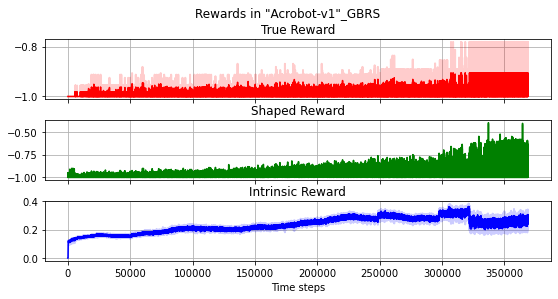

5
[        episode  timestep  done_steps  reward  int_reward
0           0.0       1.0         1.0    -1.0        0.00
1           0.0       2.0         2.0    -1.0        0.00
2           0.0       3.0         3.0    -1.0        0.00
3           0.0       4.0         4.0    -1.0        0.00
4           0.0       5.0         5.0    -1.0        0.00
...         ...       ...         ...     ...         ...
303304   1999.0      75.0    303305.0    -1.0        0.23
303305   1999.0      76.0    303306.0    -1.0        0.24
303306   1999.0      77.0    303307.0    -1.0        0.40
303307   1999.0      78.0    303308.0    -1.0        0.34
303308   1999.0      79.0    303309.0     0.0        0.32

[303309 rows x 5 columns]]


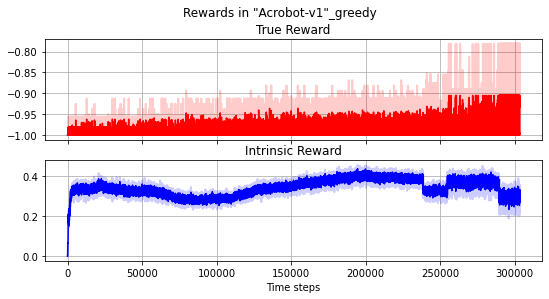

5
[        episode  timestep  done_steps  reward  int_reward  shaped_reward
0           0.0       1.0         1.0    -1.0        0.00      -0.463344
1           0.0       2.0         2.0    -1.0        0.00      -0.734338
2           0.0       3.0         3.0    -1.0        0.00      -0.648968
3           0.0       4.0         4.0    -1.0        0.00      -0.394670
4           0.0       5.0         5.0    -1.0        0.00      -0.432465
...         ...       ...         ...     ...         ...            ...
396575   1999.0      89.0    396576.0    -1.0        0.23      -1.000000
396576   1999.0      90.0    396577.0    -1.0        0.22      -1.000000
396577   1999.0      91.0    396578.0    -1.0        0.19      -1.000000
396578   1999.0      92.0    396579.0    -1.0        0.22      -1.000000
396579   1999.0      93.0    396580.0     0.0        0.28       0.000000

[396580 rows x 6 columns]]


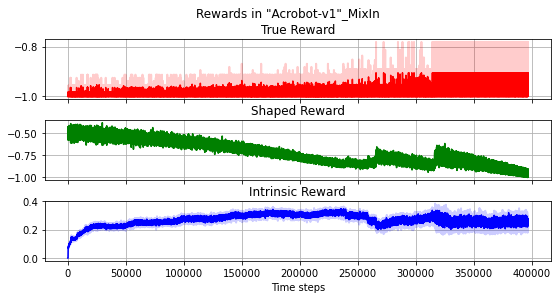

5
[        episode  timestep  done_steps  reward  int_reward  shaped_reward
0           0.0       1.0         1.0    -1.0        0.00      -1.028511
1           0.0       2.0         2.0    -1.0        0.00      -1.032194
2           0.0       3.0         3.0    -1.0        0.00      -1.028544
3           0.0       4.0         4.0    -1.0        0.00      -1.030123
4           0.0       5.0         5.0    -1.0        0.00      -1.024832
...         ...       ...         ...     ...         ...            ...
299806   1999.0      85.0    299807.0    -1.0        0.35      -1.170488
299807   1999.0      86.0    299808.0    -1.0        0.51       2.095033
299808   1999.0      87.0    299809.0    -1.0        0.40      -5.252297
299809   1999.0      88.0    299810.0    -1.0        0.39      -0.873104
299810   1999.0      89.0    299811.0     0.0        0.46       3.859437

[299811 rows x 6 columns]]


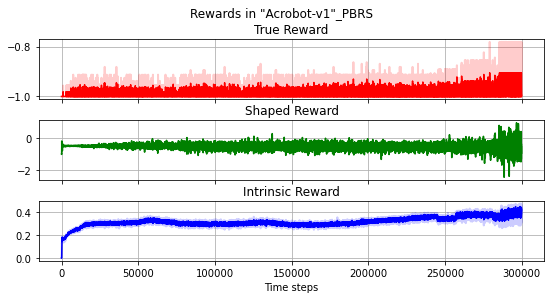

5
[        episode  timestep  done_steps  reward  int_reward  shaped_reward
0           0.0       1.0         1.0    -1.0        0.00      -1.000000
1           0.0       2.0         2.0    -1.0        0.00      -1.000000
2           0.0       3.0         3.0    -1.0        0.00      -1.000000
3           0.0       4.0         4.0    -1.0        0.00      -1.000000
4           0.0       5.0         5.0    -1.0        0.00      -1.000000
...         ...       ...         ...     ...         ...            ...
296811   1999.0      59.0    296812.0    -1.0        0.51      -1.002295
296812   1999.0      60.0    296813.0    -1.0        0.49      -1.002273
296813   1999.0      61.0    296814.0    -1.0        0.41      -1.002250
296814   1999.0      62.0    296815.0    -1.0        0.49      -1.002227
296815   1999.0      63.0    296816.0     0.0        0.30       0.000045

[296816 rows x 6 columns]]


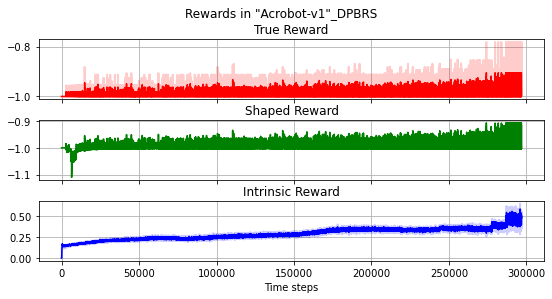

In [115]:

for i in training_methods:
    data_to_plot = []
    load_data(i)
    plot(i)
